### 1. Preparacion del entorno

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [3]:
# Cargar el dataset
df_titanic = pd.read_csv('titanic_dataset.csv')
df_titanic_clean = pd.read_csv('titanic_limpio.csv')

In [5]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Seleccionamos las columnas que vamos a usar para el clustering

features = df_titanic[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

# Reemplazamos los valores NaN en 'Age' con la media de la columna
features['Age'].fillna(features['Age'].mean(), inplace=True)

C:\Users\Luis\AppData\Local\Temp\ipykernel_22372\1415994157.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features['Age'].fillna(features['Age'].mean(), inplace=True)
C:\Users\Luis\AppData\Local\Temp\ipykernel_22372\1415994157.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Age'].fillna(features['Age'].mean(), inplace=True)

In [7]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     891 non-null    float64
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [9]:
features.head(3)

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250


In [10]:
features.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,29.699118,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# Estandarizar las características
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)    

In [14]:
features_scaled

array([[ 0.82737724, -0.5924806 ,  0.43279337, -0.47367361, -0.50244517],
       [-1.56610693,  0.63878901,  0.43279337, -0.47367361,  0.78684529],
       [ 0.82737724, -0.2846632 , -0.4745452 , -0.47367361, -0.48885426],
       ...,
       [ 0.82737724,  0.        ,  0.43279337,  2.00893337, -0.17626324],
       [-1.56610693, -0.2846632 , -0.4745452 , -0.47367361, -0.04438104],
       [ 0.82737724,  0.17706291, -0.4745452 , -0.47367361, -0.49237783]],
      shape=(891, 5))

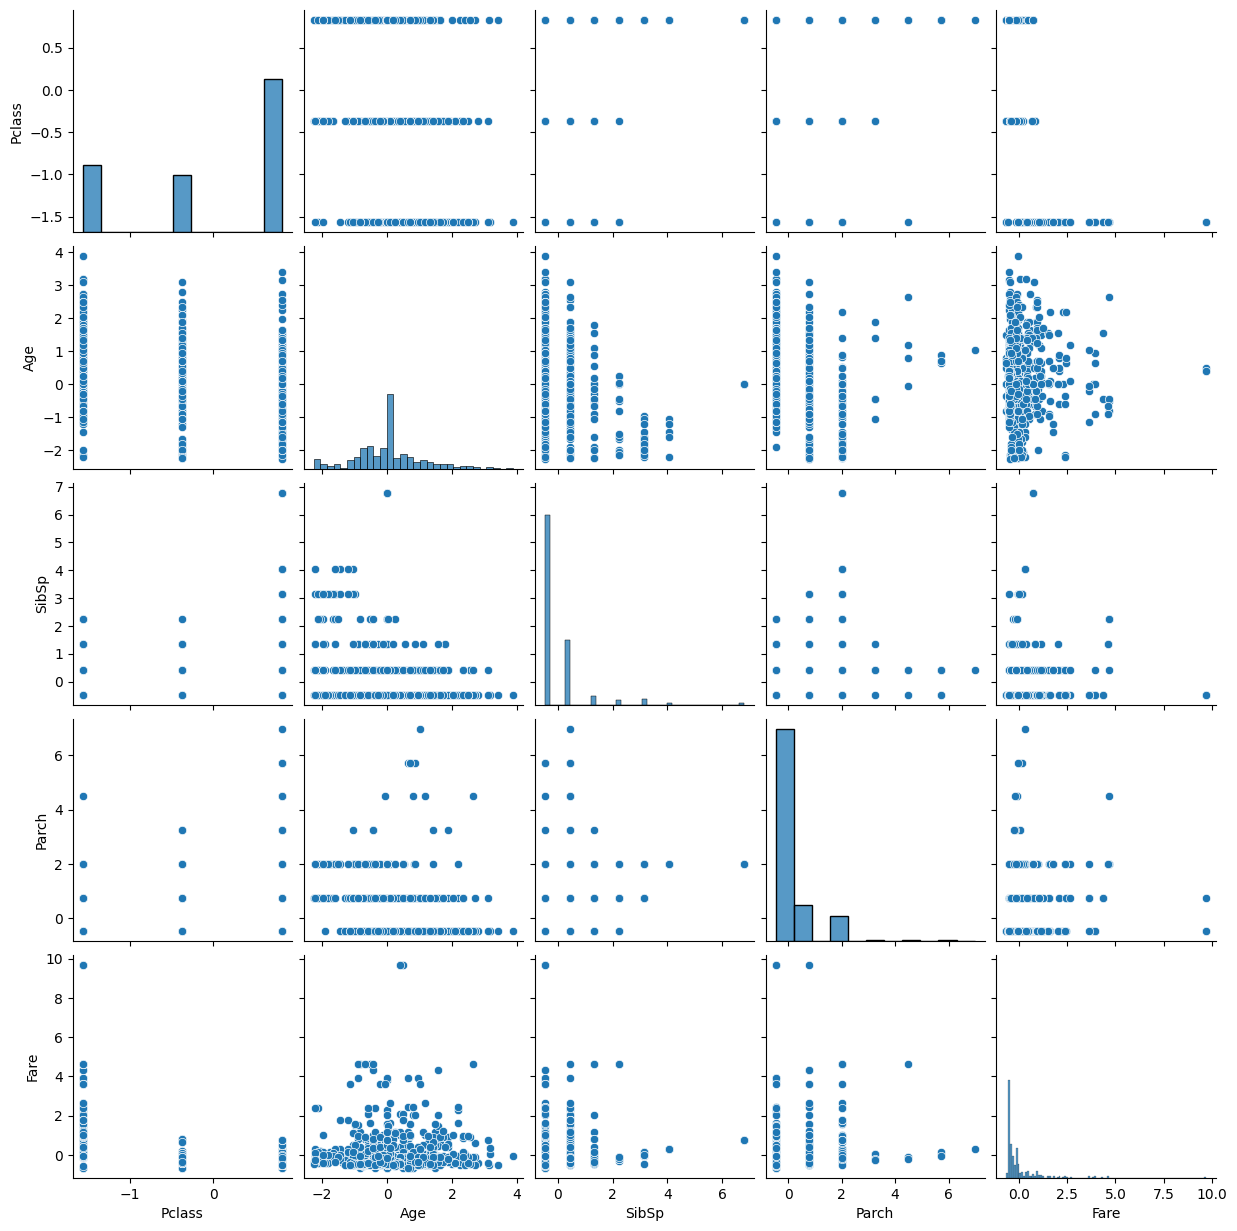

In [15]:
# Graficar con metodo de dispersion de seaborn el data set estandarizado

sns.pairplot(pd.DataFrame(features_scaled, columns=features.columns))


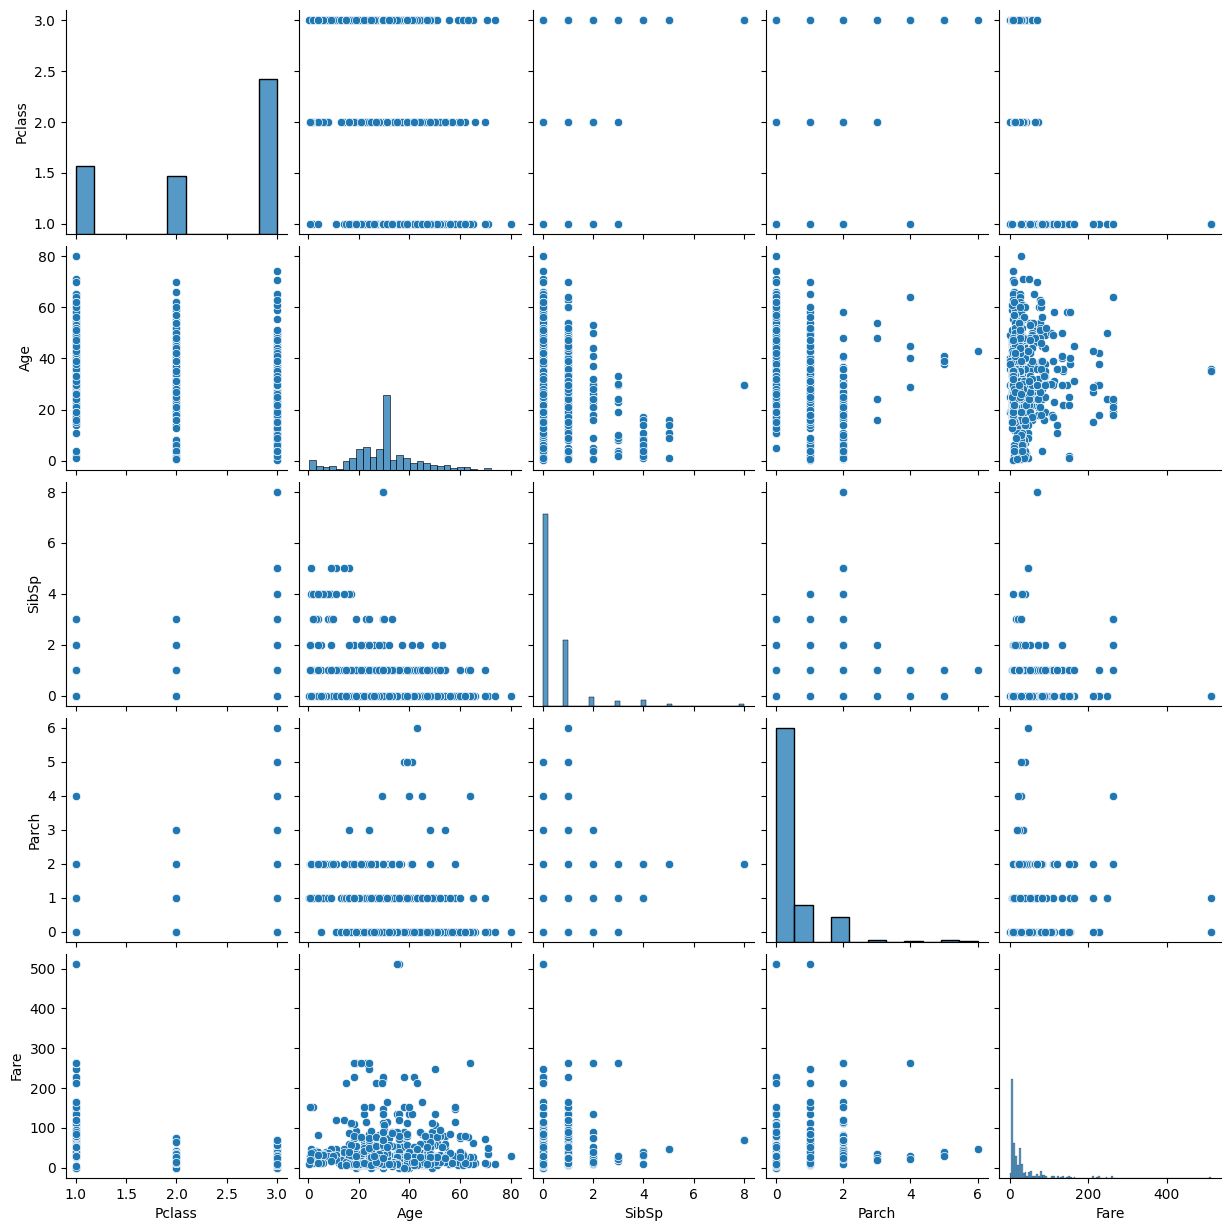

In [20]:
# ahora aplicamos el pairplot al DF no estandarizado con un tamaño de grafico de 10x10

sns.pairplot(features, height=2.5)

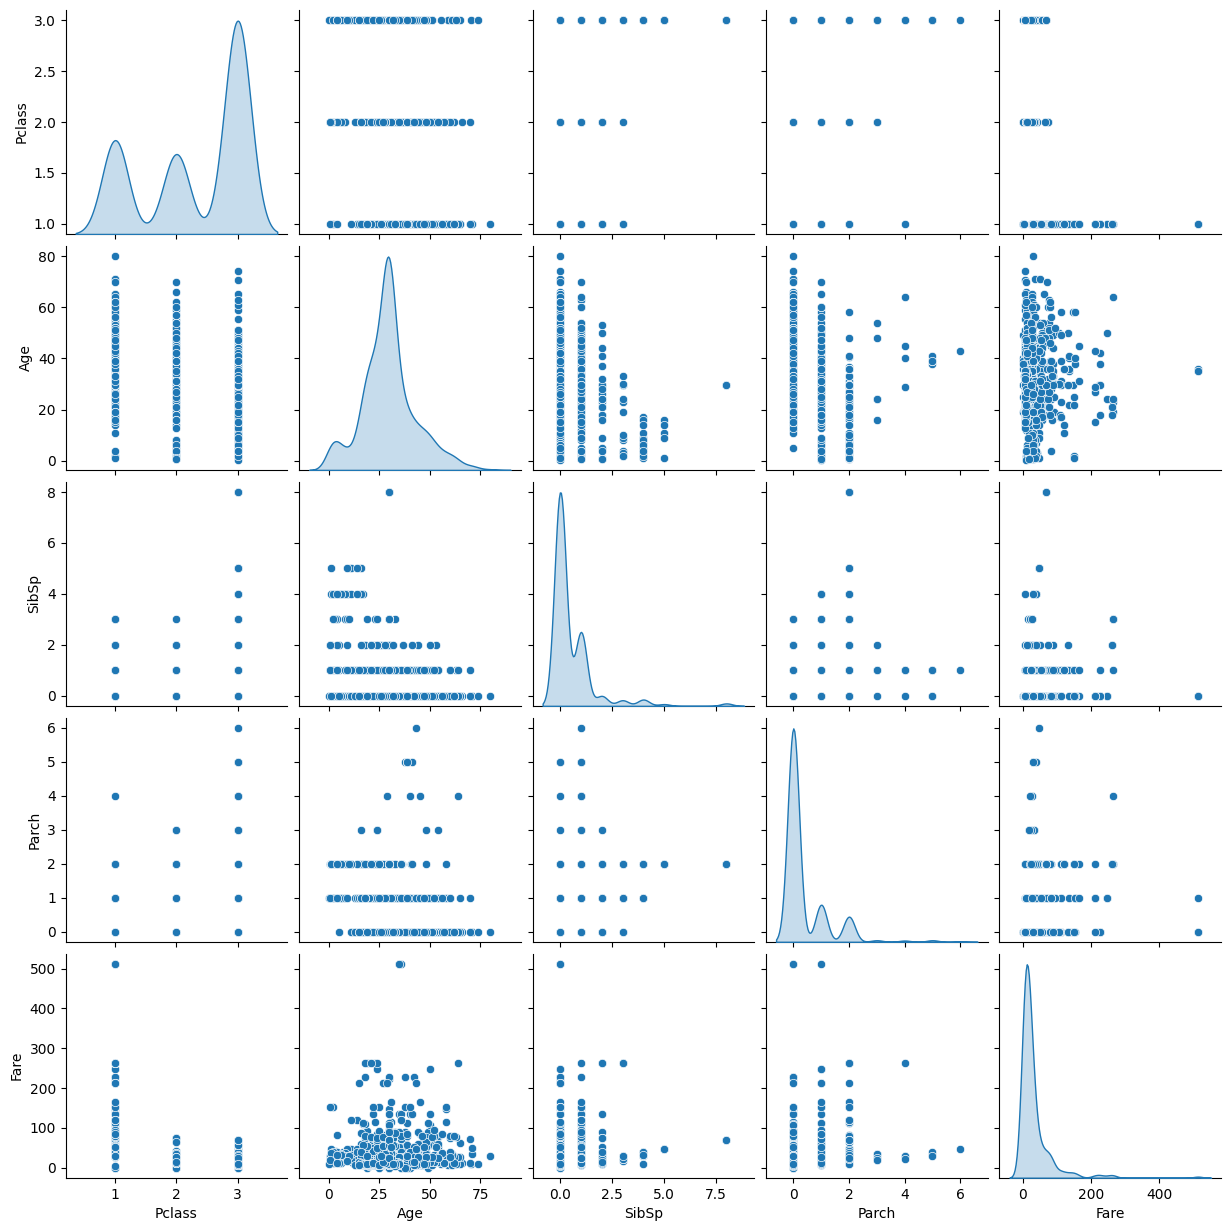

In [21]:
# aplicamos una matriz de dispersion para ver la correlacion entre las variables

sns.pairplot(features, diag_kind='kde', height=2.5)

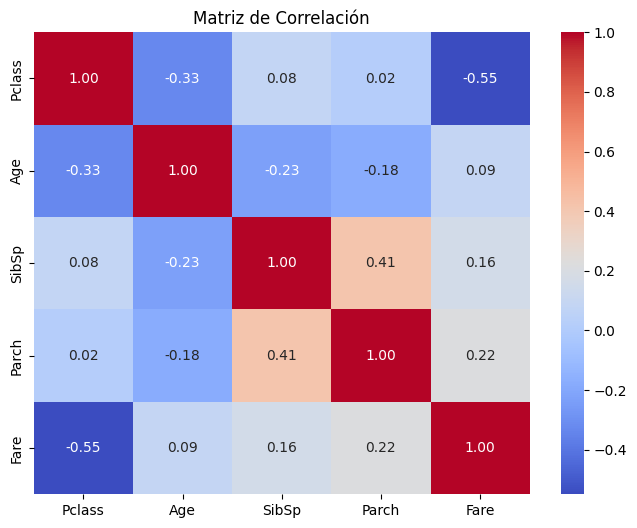

In [23]:
#correlaciones entre las variables
correlation_matrix = features.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')  
plt.show()  

### 2. Determinacion del numero de Cluster

#### 2.1 Metodo del Codo

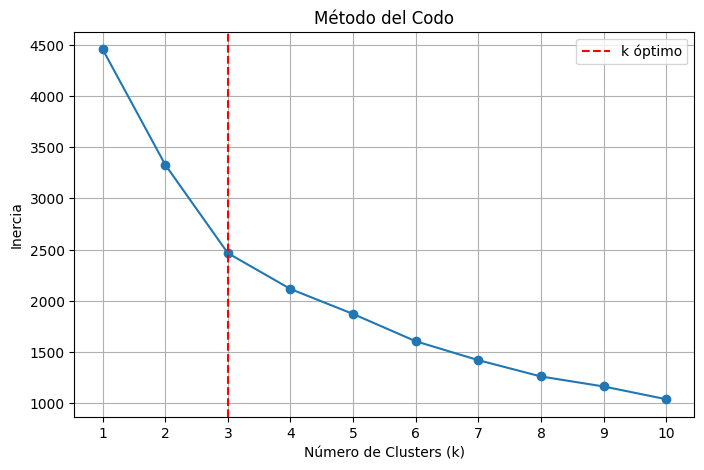

In [26]:
# determinacion del numero optimo de Cluster usando el metodo del codo

### 2. Determinacion del numero de Cluster
#### 2.1 Metodo del Codo
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.axvline(x=3, color='red', linestyle='--', label='k óptimo')
plt.legend()
plt.xticks(K)
plt.grid()
plt.show()



#### 2.2 Metodo de la Silueta

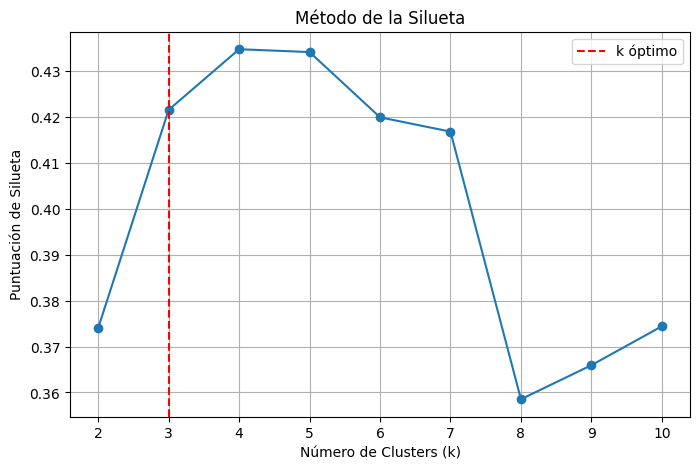

In [30]:
# Determinacion del numero optimo de Cluster usando el metodo de la silueta
#### 2.2 Metodo de la Silueta

silhouette_scores = []
K = range(2, 11)    
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    score = silhouette_score(features_scaled, kmeans.labels_)
    silhouette_scores.append(score)
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Puntuación de Silueta')
plt.title('Método de la Silueta')
plt.axvline(x=3, color='red', linestyle='--', label='k óptimo')
plt.legend()
plt.xticks(K)
plt.grid()
plt.show()


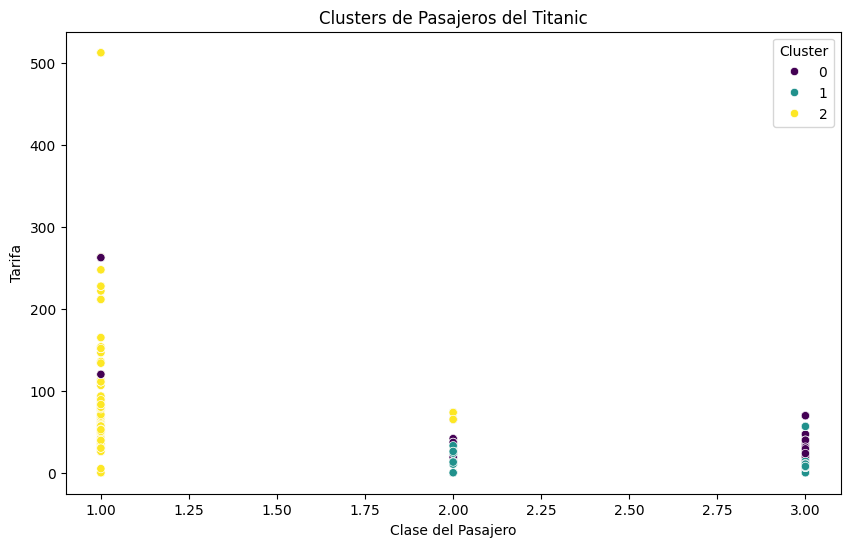

In [32]:
# implementacion del KMeans con el numero de cluster optimo

k_optimo = 3
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10, init='k-means++')   
kmeans.fit(features_scaled)
# Asignar las etiquetas de cluster al DataFrame original
df_titanic['Cluster'] = kmeans.labels_
# Visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Pclass', y='Fare', hue='Cluster', data=df_titanic, palette='viridis')
plt.title('Clusters de Pasajeros del Titanic')
plt.xlabel('Clase del Pasajero')
plt.ylabel('Tarifa')
plt.legend(title='Cluster')
plt.show()


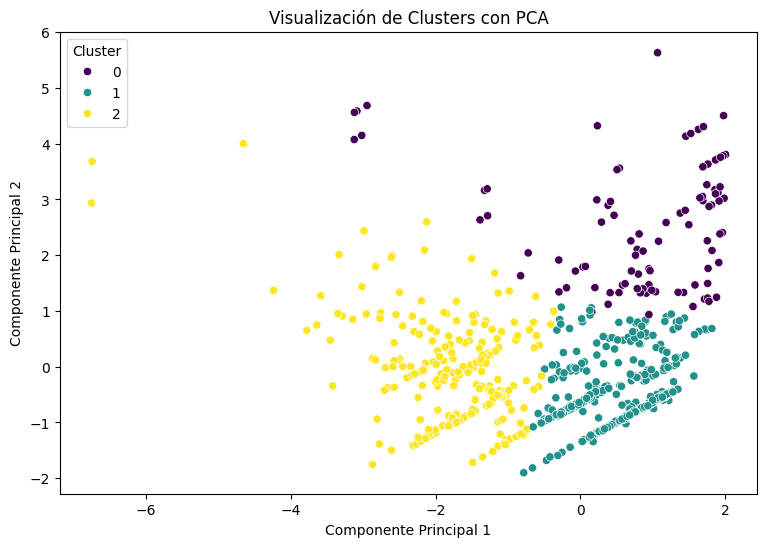

In [35]:
# reducir las dimensiones para una mejor visualizacion de los clusters

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)
plt.figure(figsize=(9, 6))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=df_titanic['Cluster'], palette='viridis')
plt.title('Visualización de Clusters con PCA')  
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')    
plt.show()